### CASTOR Wide Survey Observation Results

In [1]:
import json

# Load Wide Survey observation results from JSON
with open("wide_obs_results.json", "r") as file:
    wide_obs_results = json.load(file)

In [10]:
import pickle

# Open the pickle file that stores the list of observed Target objects
with open("wide_obs_sequence.pkl", "rb") as file:
    wide_obs_sequence = pickle.load(file)

#### Visualize Time Allocations

In [3]:
from utilities import print_time

result = wide_obs_results['final']

print("Observing efficiency:", round(result['obs_efficiency'], 2), "%")

print("Total clock time:", print_time(result['total_clock_time']))

print("Time spent on other surveys:", print_time(result['other_survey_time']))
other_survey_percentage = round((result['other_survey_time'] / result['total_clock_time']) * 100, 2)
print(f"  {other_survey_percentage}% of the total clock time")

print("Time spent on the Wide Survey:", print_time(result['total_survey_time']))
wide_survey_percentage = round((result['total_survey_time'] / result['total_clock_time']) * 100, 2)
print(f"  {wide_survey_percentage}% of the total clock time")

print("  Exposure time:", print_time(result['exposure_time']))
expo_percentage = round((result['exposure_time'] / result['total_survey_time']) * 100, 2)
print(f"    {expo_percentage}% of the time spent on the Wide Survey")

print("  Idle time:", print_time(result['idle_time']))
idle_percentage = round((result['idle_time'] / result['total_survey_time']) * 100, 2)
print(f"    {idle_percentage}% of the time spent on the Wide Survey")

print("  Slew time:", print_time(result['slew_time']))
slew_percentage = round((result['slew_time'] / result['total_survey_time']) * 100, 2)
print(f"    {slew_percentage}% of the time spent on the Wide Survey")

Observing efficiency: 75.08 %
Total clock time: 181d 00h 50m 51.782s
Time spent on other surveys: 40d 13h 28m 17.083s
  22.41% of the total clock time
Time spent on the Wide Survey: 140d 11h 22m 34.699s
  77.59% of the total clock time
  Exposure time: 105d 11h 06m 40.000s
    75.08% of the time spent on the Wide Survey
  Idle time: 01h 53m 0.292s
    0.06% of the time spent on the Wide Survey
  Slew time: 16d 16h 38m 45.448s
    11.88% of the time spent on the Wide Survey


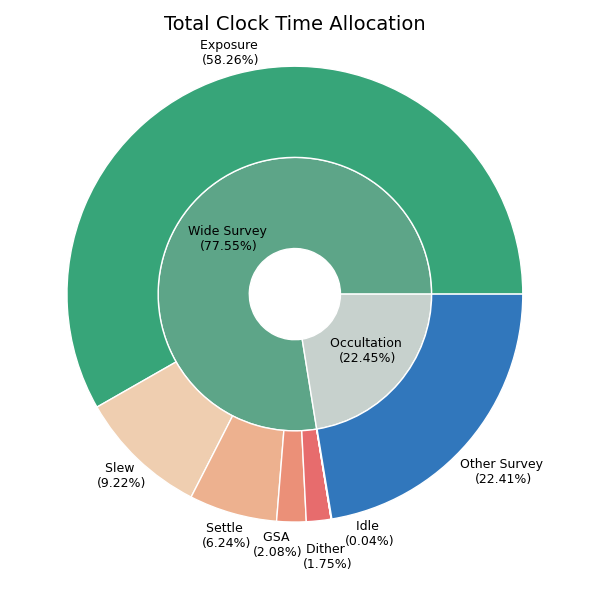

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Visualize the total clock time allocations when observing the Wide Survey

# Extract the final result from dictionary
result = wide_obs_results['final']

# Define labels and sizes for the outer and inner pie chart
outer_labels = [
    'Exposure', 'Slew', 'Settle', 'GSA', 'Dither', 'Readout', 'Idle', 'Other Survey'
]
outer_sizes = [
    result['exposure_time'], result['slew_time'], result['settle_time'], result['GSA_time'], 
    result['dither_time'], result['readout_time'], result['idle_time'], result['other_survey_time']
]
inner_labels = ['Wide Survey', 'Occultation']
inner_sizes = [
    # times spent on observing Wide Survey
    sum([result['exposure_time'], result['slew_time'], result['settle_time'], 
         result['GSA_time'], result['dither_time'], result['readout_time']]), 
    # times when the Wide Survey is occulted
    sum([result['idle_time'], result['other_survey_time']]) 
]

# Format the time segment's label with percentages
outer_label_formatted = [
    f"{label} \n({size / result['total_clock_time'] * 100:.2f}%)" for label, size in zip(outer_labels, outer_sizes)
]
outer_label_formatted[5] = "" # neglect `readout_time` label 
inner_label_formatted = [
    f"{inner_labels[0]} \n({inner_sizes[0] / result['total_clock_time'] * 100:.2f}%)",
    f"{inner_labels[1]} \n({inner_sizes[1] / result['total_clock_time'] * 100:.2f}%)"
]

# Define colors
outer_color = ["#37a579", "#efceb0", "#edb18f", "#eb9078", "#e76c6d", "#ffffff", "#de436d", "#3177bc"]
inner_color = ["#5da588", "#c7d1cd"]

# Set figure size and radius adjustment
fig, ax = plt.subplots(figsize=(6, 6))
size = 0.4

# Plot the inner pie chart
wedges_inner, _ = ax.pie(inner_sizes, radius=1-size, wedgeprops=dict(width=size, edgecolor='w'), colors=inner_color)
for i, (wedge, label) in enumerate(zip(wedges_inner, inner_label_formatted)):
    angle = (wedge.theta2 + wedge.theta1) / 2  # Midpoint angle of the wedge
    x = 0.38 * np.cos(np.radians(angle)) 
    y = 0.38 * np.sin(np.radians(angle))
    if i == 1:
        x += 0.03
    ax.text(x, y, label, fontsize=9, ha='center', va='center')

# Plot the outer pie chart
wedges_outer, _ = ax.pie(outer_sizes, radius=1, wedgeprops=dict(width=size, edgecolor='w'), colors=outer_color)
custom_label_distances = [1.1, 1.1, 1.1, 1.1, 1.16, 0, 1.1, 1.2]  # Adjust distances for each wedge
# Add custom labels
for i, (wedge, label, dist) in enumerate(zip(wedges_outer, outer_label_formatted, custom_label_distances)):
    if label:  # Skip labels with empty strings
        angle = (wedge.theta2 + wedge.theta1) / 2  # Midpoint angle of the wedge
        if i == 3:
            angle -= 3
        if i == 4:
            angle += 1
        if i == 6:
            angle += 8
        x = dist * np.cos(np.radians(angle))  
        y = dist * np.sin(np.radians(angle)) 
        ax.text(x, y, label, fontsize=9, ha='center', va='center')

plt.title("Total Clock Time Allocation", fontsize=14, y=0.95)
ax.set(aspect="equal")
plt.tight_layout()
# plt.savefig("wide_total_time_pie_chart.pdf")
plt.show()


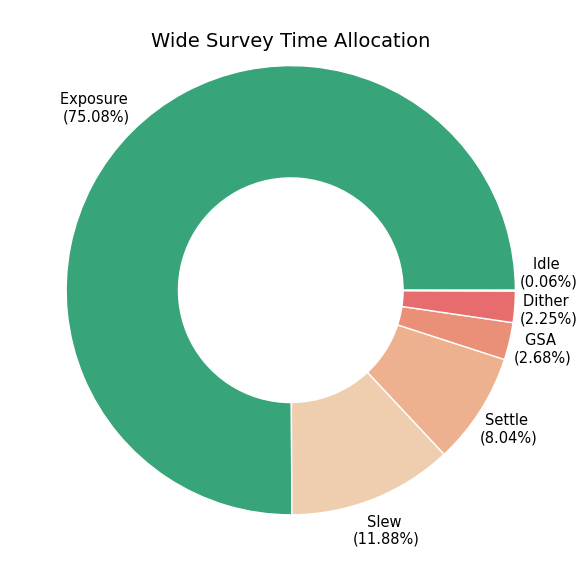

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# Visualize Wide Survey observation's time allocations

# Extract the final result from dictionary
result = wide_obs_results['final']

# Define wedge labels and sizes 
labels = ['Exposure', 'Slew', 'Settle', 'GSA', 'Dither', 'Idle']
sizes = [
    result['exposure_time'], result['slew_time'], result['settle_time'], result['GSA_time'],
    result['dither_time'], result['idle_time'] # `readout_time` is negligible
] 

# Format labels with percentages
label_formatted = [f"{label} \n({size / sum(sizes) * 100:.2f}%)" for label, size in zip(labels, sizes)]

# Define colors
color = ["#37a579", "#efceb0", "#edb18f", "#eb9078", "#e76c6d", "#de436d"]

# Set figure size
fig, ax = plt.subplots(figsize=(6, 6))

# Set explode values to pop the Exposure wedge
# explode = [0.01, 0, 0, 0, 0, 0] 

# Plot the pie chart
wedges, _ = ax.pie(sizes, wedgeprops=dict(width=0.5, edgecolor='w'), colors=color, radius=1)
# Add custom labels
for i, (wedge, label) in enumerate(zip(wedges, label_formatted)):
    angle = (wedge.theta2 + wedge.theta1) / 2  # Midpoint angle of the wedge
    if i == 5:
        angle += 4
    x = 1.15 * np.cos(np.radians(angle))  
    y = 1.15 * np.sin(np.radians(angle))
    if i == 0:
        x -= 0.05
    ax.text(x, y, label, fontsize=10.5, ha='center', va='center')

plt.title("Wide Survey Time Allocation", fontsize=14, y=0.92)
ax.set(aspect="equal") 
plt.tight_layout()
# plt.savefig("wide_survey_time_pie_chart.pdf")
plt.show()


#### Visualize the Visibility Status of Each Tile
**Tile colors**
- Green: The tile remains continuously visible throughout all four subexposures.
- Blue: An occultation occurred while observing the tile, during which the telescope slewed to other surveys.
- Red: An occultation occurred while observing the tile, during which the telescope stayed idle.

**Tile opacities**  
Corresponds to the number of uninterrupted observations comprising the total 1000s exposure per tile.

code runtime 5.658s
plot display runtime 0.001s


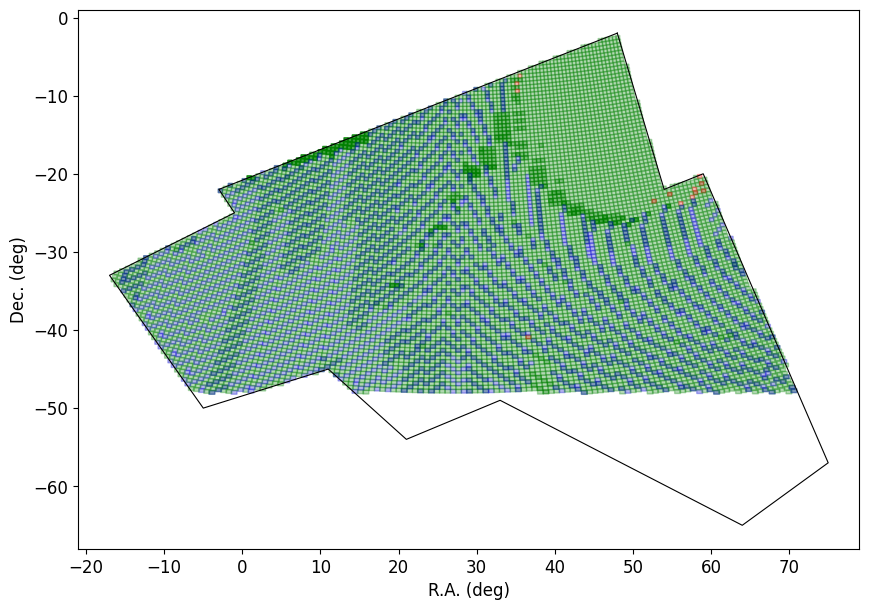

In [12]:
import numpy as np
import matplotlib.pyplot as plt

from tiling import create_course_tile
import parameters as params
from utilities import print_time

# Visualize each tile's completion status from `wide_obs_sequence`

# Create plot
fig = plt.figure(figsize=(12, 7))
ax = fig.add_subplot(111)
ax.axis([-21, 79, -68, 1])
ax.set_xticks(np.arange(-20, 80, 10))
ax.set_aspect('equal', adjustable='box')

# Plot the Wide Survey's boundary
wide_footprint = np.loadtxt('Wide_footprint.txt')
ax.plot(wide_footprint[:, 0], wide_footprint[:, 1], linewidth=0.8, color='black')

import timeit
code_start = timeit.default_timer()

tile_color = {"visible":'green', "other":'mediumblue', "idle":'red'}

# Iterate through the tiles
for tile in wide_obs_sequence:
    # plot the tile polygon
    tile_polygon = create_course_tile(
        tile.ra, tile.dec, rotation_angle=0, 
        l=params.DETECTOR_LENGTH, w=params.DETECTOR_WIDTH, g=params.DETECTOR_ARRAY_GAP
    )
    x, y = tile_polygon.exterior.xy
    ax.fill(x, y, alpha=0.3, color=tile_color[tile.status])

runtime = timeit.default_timer() - code_start
print("code runtime", print_time(runtime))

code_start = timeit.default_timer()  

ax.set_xlabel('R.A. (deg)', fontsize=12)
ax.set_ylabel('Dec. (deg)', fontsize=12)
ax.tick_params(axis='both', which='major', labelsize=12)
# plt.savefig("wide_tile_status.pdf")

runtime = timeit.default_timer() - code_start
print("plot display runtime", print_time(runtime))

#### Visualize the Number of Uninterrupted Observations of Each Tile
The tile's opacity corresponds to the number of uninterrupted observations comprising the total exposure time of 4 x 250s = 1000s.

code runtime: 4.694s


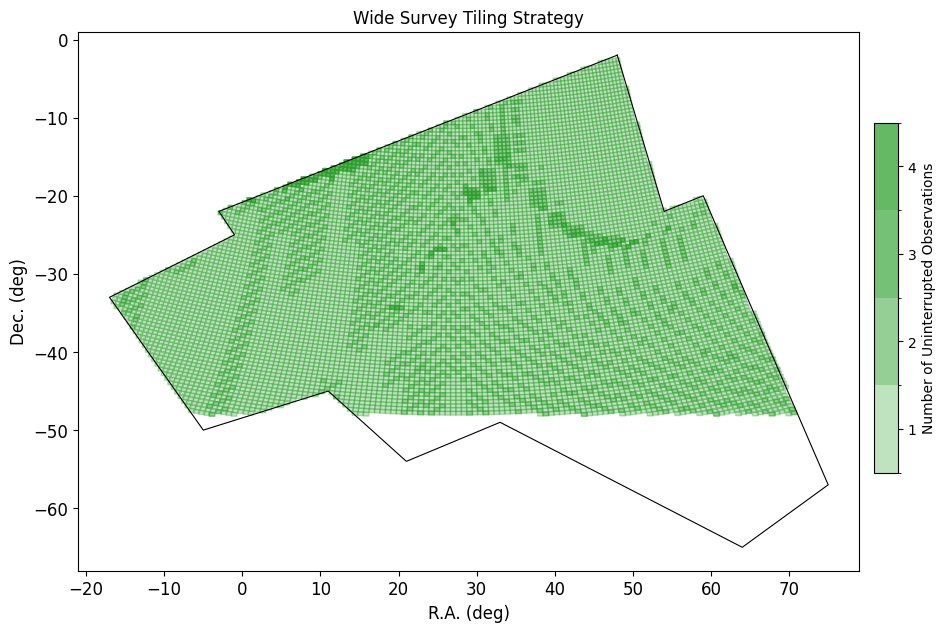

In [16]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
import timeit

from tiling import create_course_tile
import parameters as params
from utilities import print_time

# Setup for custom colormap
alphas = [0.3, 0.5, 0.65, 0.73]
visit_numbers = [1, 2, 3, 4]
base_color = mcolors.to_rgba('tab:green')
colors = [(base_color[0], base_color[1], base_color[2], alpha) for alpha in alphas]
cmap = mcolors.ListedColormap(colors)
bounds = [0.5, 1.5, 2.5, 3.5, 4.5]
norm = mcolors.BoundaryNorm(bounds, cmap.N)

# Main plot
fig, ax = plt.subplots(figsize=(12, 7))
ax.axis([-21, 79, -68, 1])
ax.set_xticks(np.arange(-20, 80, 10))
ax.set_aspect('equal', adjustable='box')

# Plot the Wide Survey's boundary
wide_footprint = np.loadtxt('Wide_footprint.txt')
ax.plot(wide_footprint[:, 0], wide_footprint[:, 1], linewidth=0.8, color='black')

# Plot each tile
code_start = timeit.default_timer()
for tile in wide_obs_sequence:
    # plot the tile polygon
    tile_polygon = create_course_tile(
        tile.ra, tile.dec, rotation_angle=0, 
        l=params.DETECTOR_LENGTH, w=params.DETECTOR_WIDTH, g=params.DETECTOR_ARRAY_GAP
    )
    x, y = tile_polygon.exterior.xy
    ax.fill(x, y, alpha=0.3, color='tab:green')

runtime = timeit.default_timer() - code_start
print("code runtime:", print_time(runtime))

ax.set_xlabel('R.A. (deg)', fontsize=12)
ax.set_ylabel('Dec. (deg)', fontsize=12)
ax.tick_params(axis='both', which='major', labelsize=12)
ax.set_title('Wide Survey Tiling Strategy')

# Add color bar next to the plot
cbar_ax = fig.add_axes([0.85, 0.25, 0.02, 0.5])  # [left, bottom, width, height]
colorbar = plt.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=cmap), cax=cbar_ax, orientation='vertical')
colorbar.set_label('Number of Uninterrupted Observations')
colorbar.set_ticks(visit_numbers)
colorbar.set_ticklabels([str(v) for v in visit_numbers])

# plt.savefig("wide_tile_num_obs.pdf")


#### Animate the Observation Sequence

runtime: 18m 26.002s


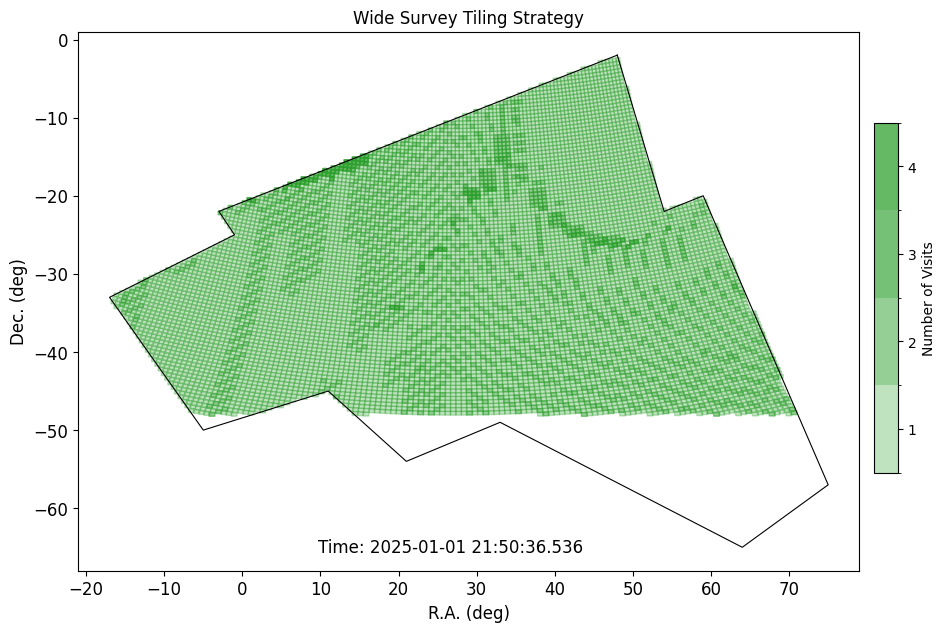

In [17]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
import timeit

from tiling import create_course_tile
import parameters as params
from utilities import print_time

code_start = timeit.default_timer()

# Setup for custom colormap
alphas = [0.3, 0.5, 0.65, 0.73]
visit_numbers = [1, 2, 3, 4]
base_color = mcolors.to_rgba('tab:green')
colors = [(base_color[0], base_color[1], base_color[2], alpha) for alpha in alphas]
cmap = mcolors.ListedColormap(colors)
bounds = [0.5, 1.5, 2.5, 3.5, 4.5]
norm = mcolors.BoundaryNorm(bounds, cmap.N)

# Main plot
fig, ax = plt.subplots(figsize=(12, 7))
ax.axis([-21, 79, -68, 1])
ax.set_xticks(np.arange(-20, 80, 10))
ax.set_aspect('equal', adjustable='box')
ax.set_xlabel('R.A. (deg)', fontsize=12)
ax.set_ylabel('Dec. (deg)', fontsize=12)
ax.tick_params(axis='both', which='major', labelsize=12)
ax.set_title('Wide Survey Tiling Strategy')

# Plot the Wide Survey's boundary
wide_footprint = np.loadtxt('Wide_footprint.txt')
ax.plot(wide_footprint[:, 0], wide_footprint[:, 1], linewidth=0.8, color='black')

# Set number of tiles to plot per frame
tiles_per_frame = 5
num_frames = len(wide_obs_sequence) // tiles_per_frame

# Add text for the timestamp at the bottom center
timestamp_text = ax.text(0.646, 0.06, '', ha='right', va='top', transform=ax.transAxes, fontsize=12)

def animate(i):
    # Clear patches for each frame to avoid overlap
    if i == 0:
        return []
    # Determine start and end indices for the batch
    start_index = (i - 1) * tiles_per_frame
    end_index = min(start_index + tiles_per_frame, len(wide_obs_sequence))
    
    # Update the timestamp to the first tile's timestamp in the batch
    current_time = wide_obs_sequence[start_index].timestamp.value
    timestamp_text.set_text(f"Time: {current_time}")

    # Add tiles for the current frame in the batch
    for tile in wide_obs_sequence[start_index:end_index]:
        # plot the tile polygon
        tile_polygon = create_course_tile(
            tile.ra, tile.dec, rotation_angle=0, 
            l=params.DETECTOR_LENGTH, w=params.DETECTOR_WIDTH, g=params.DETECTOR_ARRAY_GAP
        )
        x, y = tile_polygon.exterior.xy
        ax.fill(x, y, alpha=0.3, color='tab:green')
        
    # Return updated patches and timestamp text
    return ax.patches + [timestamp_text]

# Set up the animation
ani = FuncAnimation(fig, animate, frames=num_frames + 1, interval=25)

# Add color bar next to the plot
cbar_ax = fig.add_axes([0.85, 0.25, 0.02, 0.5])  # [left, bottom, width, height]
colorbar = plt.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=cmap), cax=cbar_ax, orientation='vertical')
colorbar.set_label('Number of Visits')
colorbar.set_ticks(visit_numbers)
colorbar.set_ticklabels([str(v) for v in visit_numbers])

plt.rcParams["animation.html"] = "jshtml"
matplotlib.rcParams['animation.embed_limit'] = 2**128  # for large animations
# Display the animation
# HTML(ani.to_jshtml())
# Save the animation
writergif = matplotlib.animation.PillowWriter(fps=30)
ani.save('wide_tiling_animation.gif', writer=writergif, dpi=150)  # increase dpi for higher quality image

runtime = timeit.default_timer() - code_start
print('runtime:', print_time(runtime))


### Wide Survey Battery Usage

In [21]:
import json

# Load Wide Survey `battery_tracker`
with open("wide_battery_tracker.json", "r") as file:
    wide_battery_tracker = json.load(file)

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime

# Plot the onboard battery energy level over time
time = wide_battery_tracker["time"]
# convert `str` to `datetime`
timestamp = [datetime.strptime(time_str, "%Y-%m-%d %H:%M:%S.%f") for time_str in time]
energy_level = wide_battery_tracker["energy_level"]

# Set up the plot
fig, ax = plt.subplots(figsize=[9, 5])
ax.plot(timestamp, energy_level)

# Set the datetime format
# date_format = mdates.DateFormatter('%Y-%m-%d')
# ax.xaxis.set_major_formatter(date_format)

# Set the timestamp locator
# locator = mdates.DayLocator(interval=14)
# ax.xaxis.set_major_locator(locator)

# plt.tick_params(direction='in')
plt.xlabel('Time')
plt.ylabel('Battery Energy Level (W-hr)')
plt.title('Onboard Battery Usage During Wide Survey Observation')
plt.legend(title='downlink frequency', fontsize=9, title_fontsize=9, loc='upper left')
plt.savefig("wide_battery.pdf")
plt.show()

### Wide Survey Data Downlink Results

In [9]:
import json

# Load Wide Survey `data_tracker` in each frequency band
with open("x_band_wide_data_tracker.json", "r") as file:
    x_band_wide_data_tracker = json.load(file)
    
with open("ka_band_wide_data_tracker.json", "r") as file:
    ka_band_wide_data_tracker = json.load(file)
    
with open("optical_wide_data_tracker.json", "r") as file:
    optical_wide_data_tracker = json.load(file)

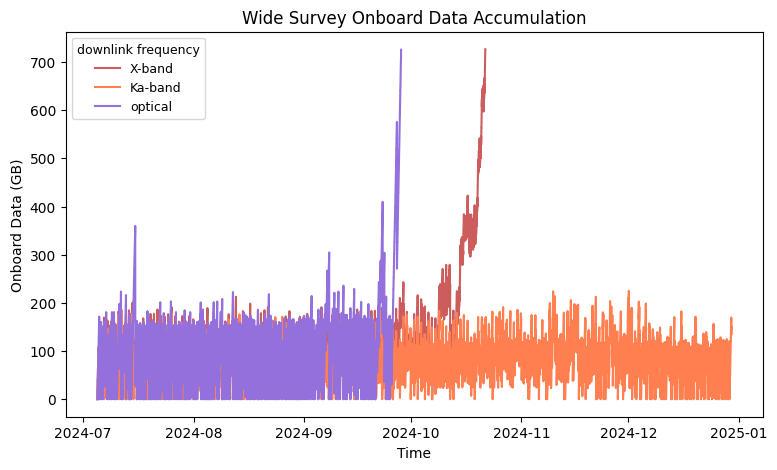

In [10]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime

# Plot the amount of onboard data over time at each downlink frequency
x_time = x_band_wide_data_tracker["time"]
# convert `str` to `datetime`
x_timestamp = [datetime.strptime(time_str, "%Y-%m-%d %H:%M:%S.%f") for time_str in x_time]
x_data_onboard = x_band_wide_data_tracker["data_onboard"]

ka_time = ka_band_wide_data_tracker["time"]
# convert `str` to `datetime`
ka_timestamp = [datetime.strptime(time_str, "%Y-%m-%d %H:%M:%S.%f") for time_str in ka_time]
ka_data_onboard = ka_band_wide_data_tracker["data_onboard"]

optical_time = optical_wide_data_tracker["time"]
# convert `str` to `datetime`
optical_timestamp = [datetime.strptime(time_str, "%Y-%m-%d %H:%M:%S.%f") for time_str in optical_time]
optical_data_onboard = optical_wide_data_tracker["data_onboard"]

# Set up the plot
fig, ax = plt.subplots(figsize=[9, 5])
ax.plot(x_timestamp, x_data_onboard, color='indianred', label='X-band')
ax.plot(ka_timestamp, ka_data_onboard, color='coral', label='Ka-band')
ax.plot(optical_timestamp, optical_data_onboard, color='mediumpurple', label='optical')

# Set the datetime format
# date_format = mdates.DateFormatter('%Y-%m-%d')
# ax.xaxis.set_major_formatter(date_format)

# Set the timestamp locator
# locator = mdates.DayLocator(interval=14)
# ax.xaxis.set_major_locator(locator)

# plt.tick_params(direction='in')
plt.xlabel('Time')
plt.ylabel('Onboard Data (GB)')
plt.title('Wide Survey Onboard Data Accumulation')
plt.legend(title='downlink frequency', fontsize=9, title_fontsize=9, loc='upper left')
plt.savefig("wide_downlink_full.pdf")
plt.show()

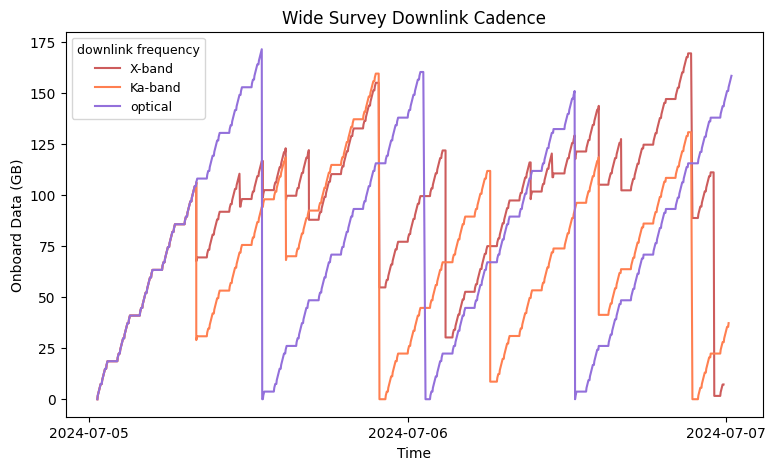

In [11]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime

data_num = 600

# Plot the amount of onboard data over time at each downlink frequency
x_time = x_band_wide_data_tracker["time"][:data_num]
# convert `str` to `datetime`
x_timestamp = [datetime.strptime(time_str, "%Y-%m-%d %H:%M:%S.%f") for time_str in x_time]
x_data_onboard = x_band_wide_data_tracker["data_onboard"][:data_num]

ka_time = ka_band_wide_data_tracker["time"][:data_num]
# convert `str` to `datetime`
ka_timestamp = [datetime.strptime(time_str, "%Y-%m-%d %H:%M:%S.%f") for time_str in ka_time]
ka_data_onboard = ka_band_wide_data_tracker["data_onboard"][:data_num]

optical_time = optical_wide_data_tracker["time"][:data_num]
# convert `str` to `datetime`
optical_timestamp = [datetime.strptime(time_str, "%Y-%m-%d %H:%M:%S.%f") for time_str in optical_time]
optical_data_onboard = optical_wide_data_tracker["data_onboard"][:data_num]

# Set up the plot
fig, ax = plt.subplots(figsize=[9, 5])
ax.plot(x_timestamp, x_data_onboard, color='indianred', label='X-band')
ax.plot(ka_timestamp, ka_data_onboard, color='coral', label='Ka-band')
ax.plot(optical_timestamp, optical_data_onboard, color='mediumpurple', label='optical')

# Set the datetime format
# date_format = mdates.DateFormatter('%Y-%m-%d')
# ax.xaxis.set_major_formatter(date_format)

# Set the timestamp locator
locator = mdates.DayLocator(interval=1)
ax.xaxis.set_major_locator(locator)

# plt.tick_params(direction='in')
plt.xlabel('Time')
plt.ylabel('Onboard Data (GB)')
plt.title('Wide Survey Downlink Cadence')
plt.legend(title='downlink frequency', fontsize=9, title_fontsize=9, loc='upper left')
plt.savefig("wide_downlink_cadence.pdf")
plt.show()

### CASTOR Cadence Survey Observation Results

In [18]:
import json
    
# Load Cadence Survey observation results from JSON
with open("cadence_survey_expo_results.json", "r") as file:
    cadence_survey_expo_results = json.load(file)

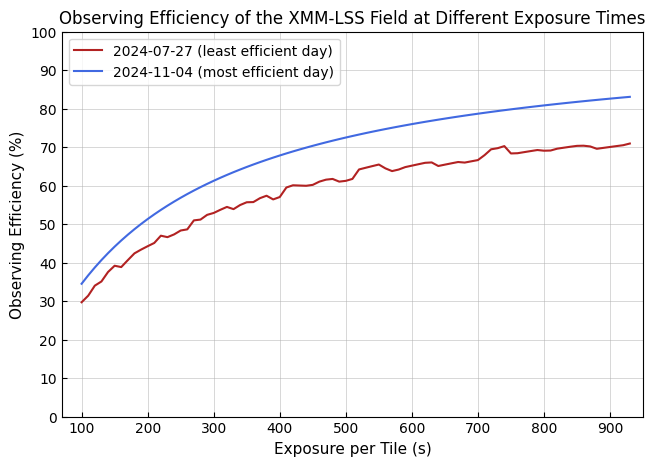

In [19]:
import matplotlib.pyplot as plt

# Plot the results
exposures = cadence_survey_expo_results["exposures"]
least_obs_day = cadence_survey_expo_results["least_efficient"]["obs_day"]
least_obs_eff = cadence_survey_expo_results["least_efficient"]["obs_effs"]
most_obs_day = cadence_survey_expo_results["most_efficient"]["obs_day"]
most_obs_eff = cadence_survey_expo_results["most_efficient"]["obs_effs"]

fig = plt.figure(figsize=(7.5, 5))
plt.plot(exposures, least_obs_eff, label=f"{least_obs_day} (least efficient day)", color='firebrick')
plt.plot(exposures, most_obs_eff, label=f"{most_obs_day} (most efficient day)", color='royalblue')

plt.xlim(70, 950)
plt.ylim(0, 100)
plt.xticks(range(100, 1000, 100))
plt.yticks(range(0, 110, 10))
plt.tick_params(direction='in')

plt.xlabel("Exposure per Tile (s)", fontsize=11)
plt.ylabel("Observing Efficiency (%)", fontsize=11)
plt.title("Observing Efficiency of the XMM-LSS Field at Different Exposure Times")
plt.legend(loc='upper left')
plt.grid(True, alpha=0.7, linewidth=0.5)
# plt.savefig('XMM-LSS (obs_eff vs. exposure).pdf')
plt.show()


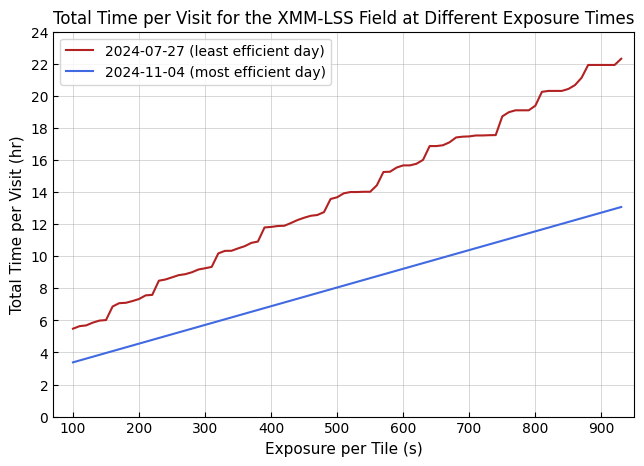

In [20]:
least_total_time = cadence_survey_expo_results["least_efficient"]["total_time"]
most_total_time = cadence_survey_expo_results["most_efficient"]["total_time"]
least_total_time_hr = np.array(least_total_time) / 3600
most_total_time_hr = np.array(most_total_time) / 3600

fig = plt.figure(figsize=(7.5, 5))
plt.plot(exposures, least_total_time_hr, label=f"{least_obs_day} (least efficient day)", color='firebrick')
plt.plot(exposures, most_total_time_hr, label=f"{most_obs_day} (most efficient day)", color='royalblue')

plt.xlim(70, 950)
plt.ylim(0, 24)
plt.xticks(range(100, 1000, 100))
plt.yticks(range(0, 25, 2))
plt.tick_params(direction='in')

plt.xlabel("Exposure per Tile (s)", fontsize=11)
plt.ylabel("Total Time per Visit (hr)", fontsize=11)
plt.title("Total Time per Visit for the XMM-LSS Field at Different Exposure Times")
plt.legend(loc='upper left')
plt.grid(True, alpha=0.7, linewidth=0.5)
# plt.savefig('XMM-LSS (total_time vs. exposure).pdf')
plt.show()
